In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback, EarlyStopping

%matplotlib inline

In [104]:
Q2_cut = 100

In [105]:
def split_trval(x_data, y_data, perc = 0.3):
    size_val = round(x_data.shape[0]*perc)
    if size_val > 0:
        idx = np.random.choice(np.arange(1, x_data.shape[0]-1, 2), size_val, replace=False)
        x_val = x_data[idx]
        y_val = y_data[idx]
        x_tr = np.delete(x_data, idx, axis = 0)
        y_tr = np.delete(y_data, idx)
    else:
        x_tr = x_data
        y_tr = y_data
        x_val = None
        y_val = None
    return x_tr, y_tr, x_val, y_val, size_val

In [143]:
# Load data
filenames = os.listdir("./data")
filenames = ["DATA_CHORUS_0.02.yaml"]

for i, filename in enumerate(filenames):
    with open("./data/" + filename, "r") as file:
        input_data = yaml.safe_load(file)
    
    x = input_data["x"]
    Q2 = np.array(input_data["Q2"])
    F_2 = np.array(input_data["F_2"])
    
    Q2_mask = np.where(Q2<Q2_cut)
    Q2 = Q2[Q2_mask]
    F_2 = F_2[Q2_mask]
    
    if i == 0:
        x_data = np.zeros((len(Q2), 2))
        x_data[:, 0] = x
        x_data[:, 1] = Q2 
        y_data = F_2
        x_tr, y_tr, x_val, y_val, size_val = split_trval(x_data, y_data)
    else:
        x_data = np.zeros((len(Q2), 2))
        x_data[:, 0] = x
        x_data[:, 1] = Q2 
        y_data = F_2
        x_tr_new, y_tr_new, x_val_new, y_val_new, size_val = split_trval(x_data, y_data)
        
        x_tr = np.concatenate([x_tr, x_tr_new], axis = 0)
        y_tr = np.concatenate([y_tr, y_tr_new], axis = 0)
        if size_val != 0:
            x_val = np.concatenate([x_val, x_val_new], axis = 0)
            y_val = np.concatenate([y_val, y_val_new], axis = 0)

print(x_data.shape)
print(y_data.shape)

(6, 2)
(6,)


In [144]:
# Create the NN model
model = Sequential()
model.add(Dense(units = 1, activation = 'linear', input_shape=[2]))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam", metrics=["accuracy"])

# Display the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 1,156
Trainable params: 1,156
Non-trainable params: 0
_________________________________________________________________


In [145]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=500)
model.fit(x_tr, y_tr, validation_data=(x_val ,y_val), epochs=1000, batch_size=1, verbose=1)

Epoch 1/1000
4/4 [==============================] - 1s 55ms/step - loss: 1.0505 - accuracy: 0.0000e+00 - val_loss: 0.8669 - val_accuracy: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.7316 - accuracy: 0.0000e+00 - val_loss: 0.7245 - val_accuracy: 0.0000e+00
Epoch 3/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4814 - accuracy: 0.0000e+00 - val_loss: 0.6015 - val_accuracy: 0.0000e+00
Epoch 4/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.3116 - accuracy: 0.0000e+00 - val_loss: 0.4937 - val_accuracy: 0.0000e+00
Epoch 5/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.3258 - accuracy: 0.0000e+00 - val_loss: 0.4047 - val_accuracy: 0.0000e+00
Epoch 6/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.3166 - accuracy: 0.0000e+00 - val_loss: 0.3322 - val_accuracy: 0.0000e+00
Epoch 7/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1343 - accuracy: 0.0000e+00 - v

Epoch 56/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0490 - accuracy: 0.0000e+00 - val_loss: 0.0728 - val_accuracy: 0.0000e+00
Epoch 57/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0418 - accuracy: 0.0000e+00 - val_loss: 0.0706 - val_accuracy: 0.0000e+00
Epoch 58/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0400 - accuracy: 0.0000e+00 - val_loss: 0.0681 - val_accuracy: 0.0000e+00
Epoch 59/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.0000e+00 - val_loss: 0.0646 - val_accuracy: 0.0000e+00
Epoch 60/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0504 - accuracy: 0.0000e+00 - val_loss: 0.0591 - val_accuracy: 0.0000e+00
Epoch 61/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0325 - accuracy: 0.0000e+00 - val_loss: 0.0529 - val_accuracy: 0.0000e+00
Epoch 62/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0249 - accuracy: 0.0000e

4/4 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 111/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 112/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 113/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 114/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 0.0079 - val_accuracy: 0.0000e+00
Epoch 115/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 116/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - va

4/4 [==============================] - 0s 14ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 165/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 166/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 167/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 168/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 169/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 170/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - va

Epoch 218/1000
4/4 [==============================] - 0s 15ms/step - loss: 5.9660e-04 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 219/1000
4/4 [==============================] - 0s 15ms/step - loss: 5.3050e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 220/1000
4/4 [==============================] - 0s 14ms/step - loss: 6.7281e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 221/1000
4/4 [==============================] - 0s 18ms/step - loss: 3.7731e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 222/1000
4/4 [==============================] - 0s 14ms/step - loss: 2.6279e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 223/1000
4/4 [==============================] - 0s 16ms/step - loss: 9.3901e-04 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 224/1000
4/4 [==============================] - 0s 15ms/step - l

4/4 [==============================] - 0s 16ms/step - loss: 1.5946e-04 - accuracy: 0.0000e+00 - val_loss: 7.7364e-04 - val_accuracy: 0.0000e+00
Epoch 271/1000
4/4 [==============================] - 0s 12ms/step - loss: 8.7288e-05 - accuracy: 0.0000e+00 - val_loss: 7.5682e-04 - val_accuracy: 0.0000e+00
Epoch 272/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.6425e-04 - accuracy: 0.0000e+00 - val_loss: 6.2949e-04 - val_accuracy: 0.0000e+00
Epoch 273/1000
4/4 [==============================] - 0s 15ms/step - loss: 7.5804e-05 - accuracy: 0.0000e+00 - val_loss: 5.2124e-04 - val_accuracy: 0.0000e+00
Epoch 274/1000
4/4 [==============================] - 0s 16ms/step - loss: 6.9463e-05 - accuracy: 0.0000e+00 - val_loss: 6.6046e-04 - val_accuracy: 0.0000e+00
Epoch 275/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0527e-04 - accuracy: 0.0000e+00 - val_loss: 7.7167e-04 - val_accuracy: 0.0000e+00
Epoch 276/1000
4/4 [==============================] - 0s 13ms

4/4 [==============================] - 0s 13ms/step - loss: 1.7402e-05 - accuracy: 0.0000e+00 - val_loss: 4.8625e-04 - val_accuracy: 0.0000e+00
Epoch 322/1000
4/4 [==============================] - 0s 14ms/step - loss: 3.9253e-05 - accuracy: 0.0000e+00 - val_loss: 4.8246e-04 - val_accuracy: 0.0000e+00
Epoch 323/1000
4/4 [==============================] - 0s 15ms/step - loss: 4.5766e-05 - accuracy: 0.0000e+00 - val_loss: 5.7581e-04 - val_accuracy: 0.0000e+00
Epoch 324/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.1942e-05 - accuracy: 0.0000e+00 - val_loss: 4.7382e-04 - val_accuracy: 0.0000e+00
Epoch 325/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.2645e-05 - accuracy: 0.0000e+00 - val_loss: 4.5760e-04 - val_accuracy: 0.0000e+00
Epoch 326/1000
4/4 [==============================] - 0s 17ms/step - loss: 3.2226e-05 - accuracy: 0.0000e+00 - val_loss: 4.8487e-04 - val_accuracy: 0.0000e+00
Epoch 327/1000
4/4 [==============================] - 0s 16ms

4/4 [==============================] - 0s 15ms/step - loss: 1.7902e-06 - accuracy: 0.0000e+00 - val_loss: 3.3842e-04 - val_accuracy: 0.0000e+00
Epoch 373/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.8994e-06 - accuracy: 0.0000e+00 - val_loss: 3.1010e-04 - val_accuracy: 0.0000e+00
Epoch 374/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.4219e-06 - accuracy: 0.0000e+00 - val_loss: 2.7553e-04 - val_accuracy: 0.0000e+00
Epoch 375/1000
4/4 [==============================] - 0s 14ms/step - loss: 2.2509e-06 - accuracy: 0.0000e+00 - val_loss: 3.0974e-04 - val_accuracy: 0.0000e+00
Epoch 376/1000
4/4 [==============================] - 0s 13ms/step - loss: 3.8091e-06 - accuracy: 0.0000e+00 - val_loss: 3.1671e-04 - val_accuracy: 0.0000e+00
Epoch 377/1000
4/4 [==============================] - 0s 13ms/step - loss: 5.3423e-06 - accuracy: 0.0000e+00 - val_loss: 3.2245e-04 - val_accuracy: 0.0000e+00
Epoch 378/1000
4/4 [==============================] - 0s 16ms

4/4 [==============================] - 0s 21ms/step - loss: 4.2621e-07 - accuracy: 0.0000e+00 - val_loss: 2.8719e-04 - val_accuracy: 0.0000e+00
Epoch 424/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.7651e-07 - accuracy: 0.0000e+00 - val_loss: 2.9532e-04 - val_accuracy: 0.0000e+00
Epoch 425/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.7822e-07 - accuracy: 0.0000e+00 - val_loss: 2.9435e-04 - val_accuracy: 0.0000e+00
Epoch 426/1000
4/4 [==============================] - 0s 19ms/step - loss: 9.7579e-08 - accuracy: 0.0000e+00 - val_loss: 2.8589e-04 - val_accuracy: 0.0000e+00
Epoch 427/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.3996e-07 - accuracy: 0.0000e+00 - val_loss: 2.9108e-04 - val_accuracy: 0.0000e+00
Epoch 428/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.7608e-07 - accuracy: 0.0000e+00 - val_loss: 2.9335e-04 - val_accuracy: 0.0000e+00
Epoch 429/1000
4/4 [==============================] - 0s 15ms

4/4 [==============================] - 0s 19ms/step - loss: 2.6081e-08 - accuracy: 0.0000e+00 - val_loss: 2.9246e-04 - val_accuracy: 0.0000e+00
Epoch 475/1000
4/4 [==============================] - 0s 17ms/step - loss: 9.0190e-09 - accuracy: 0.0000e+00 - val_loss: 2.8198e-04 - val_accuracy: 0.0000e+00
Epoch 476/1000
4/4 [==============================] - 0s 16ms/step - loss: 2.4593e-08 - accuracy: 0.0000e+00 - val_loss: 2.8594e-04 - val_accuracy: 0.0000e+00
Epoch 477/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.9706e-08 - accuracy: 0.0000e+00 - val_loss: 2.9059e-04 - val_accuracy: 0.0000e+00
Epoch 478/1000
4/4 [==============================] - 0s 17ms/step - loss: 2.9903e-08 - accuracy: 0.0000e+00 - val_loss: 2.8465e-04 - val_accuracy: 0.0000e+00
Epoch 479/1000
4/4 [==============================] - 0s 17ms/step - loss: 7.3022e-09 - accuracy: 0.0000e+00 - val_loss: 2.8581e-04 - val_accuracy: 0.0000e+00
Epoch 480/1000
4/4 [==============================] - 0s 15ms

4/4 [==============================] - 0s 17ms/step - loss: 2.1662e-10 - accuracy: 0.0000e+00 - val_loss: 2.8651e-04 - val_accuracy: 0.0000e+00
Epoch 526/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.5416e-10 - accuracy: 0.0000e+00 - val_loss: 2.8612e-04 - val_accuracy: 0.0000e+00
Epoch 527/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.4570e-10 - accuracy: 0.0000e+00 - val_loss: 2.8623e-04 - val_accuracy: 0.0000e+00
Epoch 528/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.2687e-10 - accuracy: 0.0000e+00 - val_loss: 2.8626e-04 - val_accuracy: 0.0000e+00
Epoch 529/1000
4/4 [==============================] - 0s 17ms/step - loss: 4.6951e-10 - accuracy: 0.0000e+00 - val_loss: 2.8605e-04 - val_accuracy: 0.0000e+00
Epoch 530/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.3097e-10 - accuracy: 0.0000e+00 - val_loss: 2.8631e-04 - val_accuracy: 0.0000e+00
Epoch 531/1000
4/4 [==============================] - 0s 17ms

4/4 [==============================] - 0s 14ms/step - loss: 4.1065e-12 - accuracy: 0.0000e+00 - val_loss: 2.8604e-04 - val_accuracy: 0.0000e+00
Epoch 577/1000
4/4 [==============================] - 0s 15ms/step - loss: 3.4898e-12 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 578/1000
4/4 [==============================] - 0s 15ms/step - loss: 3.5923e-12 - accuracy: 0.0000e+00 - val_loss: 2.8605e-04 - val_accuracy: 0.0000e+00
Epoch 579/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.4754e-12 - accuracy: 0.0000e+00 - val_loss: 2.8600e-04 - val_accuracy: 0.0000e+00
Epoch 580/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.9265e-12 - accuracy: 0.0000e+00 - val_loss: 2.8600e-04 - val_accuracy: 0.0000e+00
Epoch 581/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.6960e-12 - accuracy: 0.0000e+00 - val_loss: 2.8605e-04 - val_accuracy: 0.0000e+00
Epoch 582/1000
4/4 [==============================] - 0s 15ms

4/4 [==============================] - 0s 14ms/step - loss: 9.2371e-14 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 628/1000
4/4 [==============================] - 0s 19ms/step - loss: 2.6053e-14 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 629/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.0383e-14 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 630/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.3211e-14 - accuracy: 0.0000e+00 - val_loss: 2.8600e-04 - val_accuracy: 0.0000e+00
Epoch 631/1000
4/4 [==============================] - 0s 14ms/step - loss: 4.3817e-14 - accuracy: 0.0000e+00 - val_loss: 2.8600e-04 - val_accuracy: 0.0000e+00
Epoch 632/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0173e-13 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 633/1000
4/4 [==============================] - 0s 14ms

4/4 [==============================] - 0s 13ms/step - loss: 8.8107e-14 - accuracy: 0.0000e+00 - val_loss: 2.8602e-04 - val_accuracy: 0.0000e+00
Epoch 679/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.2517e-13 - accuracy: 0.0000e+00 - val_loss: 2.8600e-04 - val_accuracy: 0.0000e+00
Epoch 680/1000
4/4 [==============================] - 0s 13ms/step - loss: 5.8738e-14 - accuracy: 0.0000e+00 - val_loss: 2.8603e-04 - val_accuracy: 0.0000e+00
Epoch 681/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.3110e-13 - accuracy: 0.0000e+00 - val_loss: 2.8599e-04 - val_accuracy: 0.0000e+00
Epoch 682/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.7100e-13 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 683/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.1748e-13 - accuracy: 0.0000e+00 - val_loss: 2.8602e-04 - val_accuracy: 0.0000e+00
Epoch 684/1000
4/4 [==============================] - 0s 16ms

4/4 [==============================] - 0s 14ms/step - loss: 6.8686e-15 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 730/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.2434e-14 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 731/1000
4/4 [==============================] - 0s 16ms/step - loss: 1.3500e-14 - accuracy: 0.0000e+00 - val_loss: 2.8601e-04 - val_accuracy: 0.0000e+00
Epoch 732/1000
4/4 [==============================] - 0s 16ms/step - loss: 9.9476e-15 - accuracy: 0.0000e+00 - val_loss: 2.8600e-04 - val_accuracy: 0.0000e+00
Epoch 733/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.9027e-14 - accuracy: 0.0000e+00 - val_loss: 2.8602e-04 - val_accuracy: 0.0000e+00
Epoch 734/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.3211e-14 - accuracy: 0.0000e+00 - val_loss: 2.8602e-04 - val_accuracy: 0.0000e+00
Epoch 735/1000
4/4 [==============================] - 0s 14ms

KeyboardInterrupt: 

In [139]:
y_tr_pred = model.predict(x_tr)
y_val_pred = model.predict(x_val)

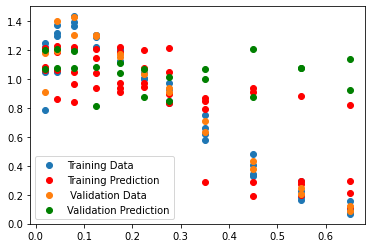

In [140]:
plt.scatter(x_tr[:,0], y_tr, label = "Training Data")
plt.scatter(x_tr[:,0], y_tr_pred, color = "red", label = "Training Prediction")
plt.scatter(x_val[:,0], y_val, label = " Validation Data")
plt.scatter(x_val[:,0], y_val_pred, color = "green", label = "Validation Prediction")
plt.legend()